In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordD1_M1_P2_7_17_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\D1\video_time\D1_M1_P2_7_17_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\D1\stimulus_time\D1_M1_P2_7_17_24_stimulus_time0.csv'

north_pixel = 115
south_pixel = 436
east_pixel = 487
west_pixel = 146
shelter_x_pixel = 170
shelter_y_pixel = 285

#estimate for when mouse reaches shelter
escape_done = 4.3 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
coord_scaled = filter_data(.9, coords)

In [7]:
convert_time(time_path, coord_scaled, audio_path, 1)
convert_time(time_path, coords, audio_path, 1)

In [8]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [9]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [10]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [11]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [12]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

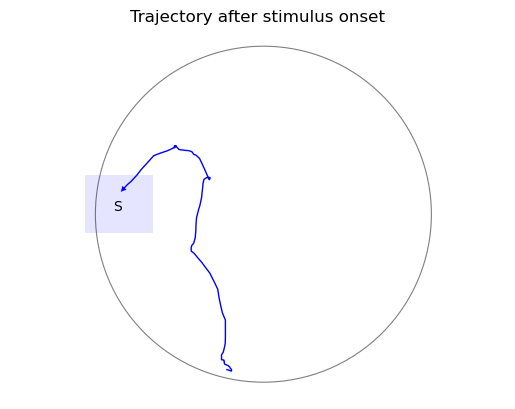

In [13]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

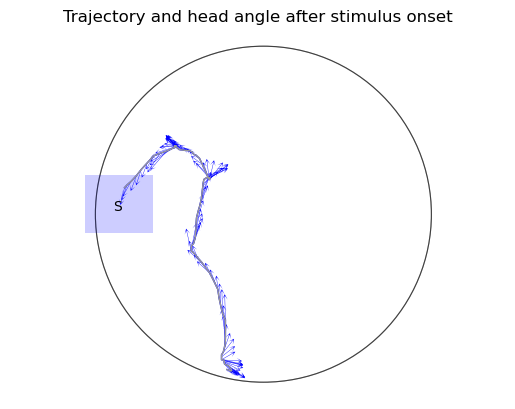

In [14]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

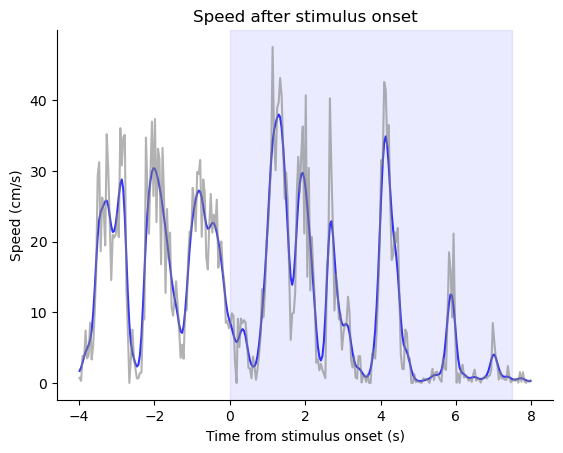

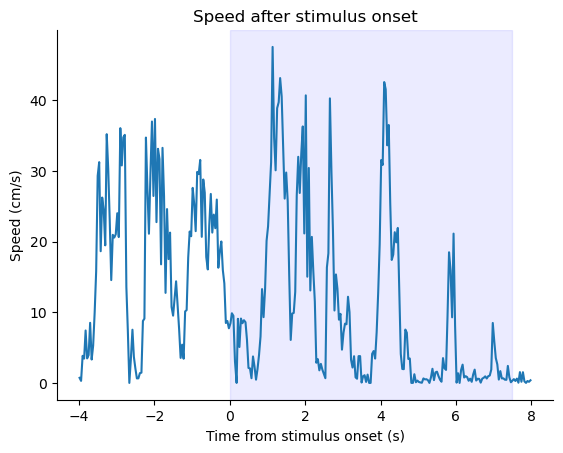

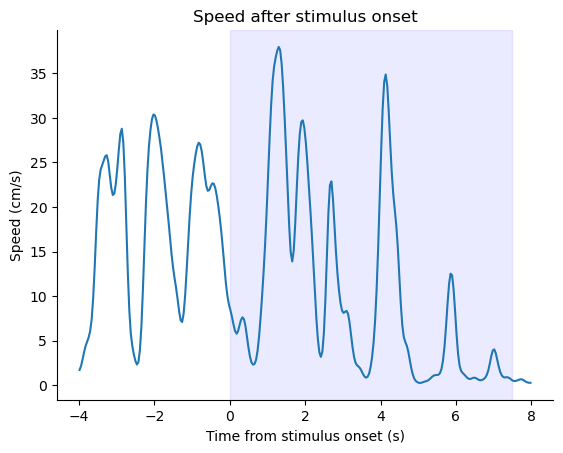

In [15]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, False, False, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

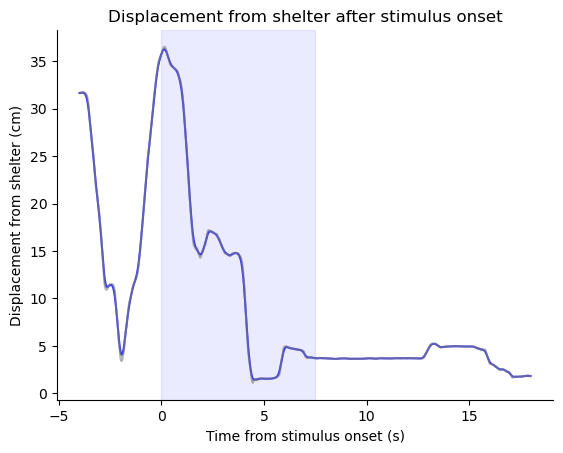

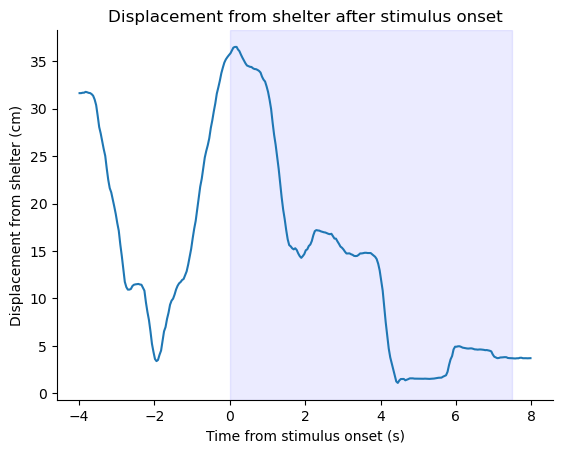

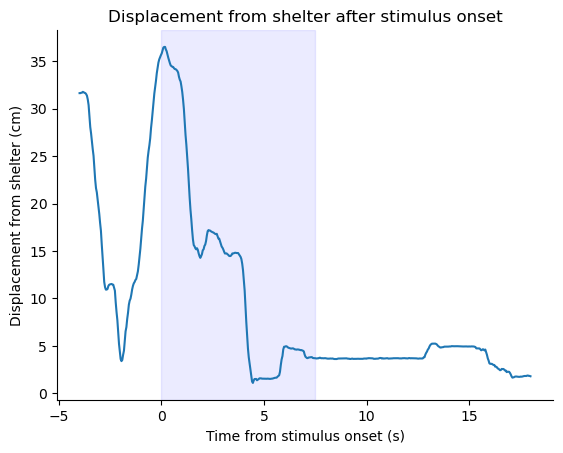

In [16]:
displacement_figure(-4, 18,coord_scaled, False, True, sigma)
displacement_figure(-4, 8, coord_scaled, False, False, sigma)
displacement_figure(-4, 18,coord_scaled, False, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

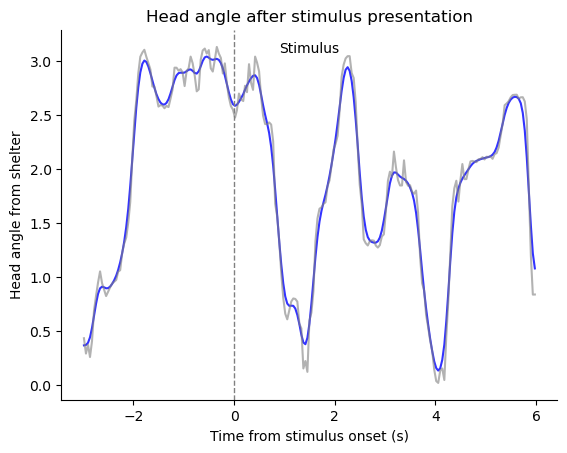

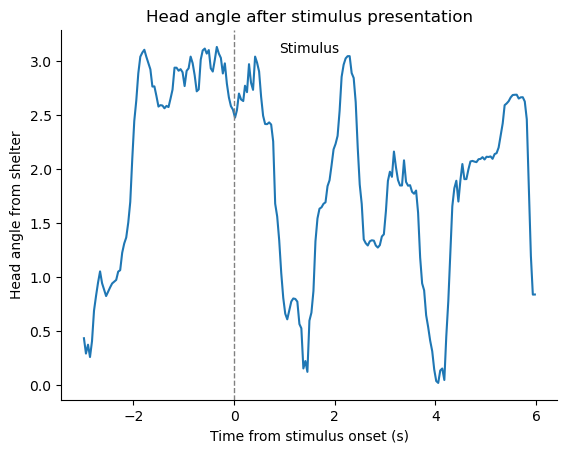

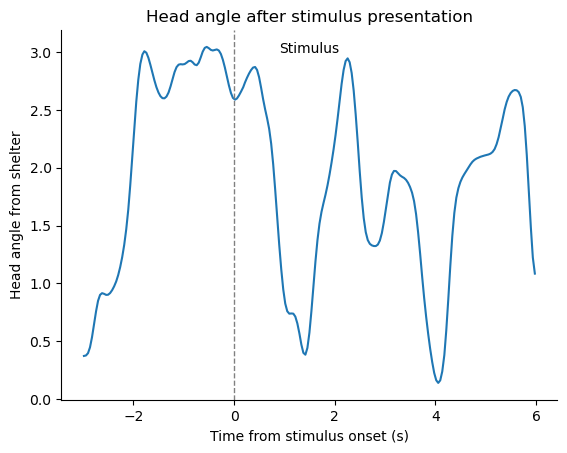

In [17]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [18]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [19]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [20]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9092,9092,9092,NaN,NaN,0.110160,-4.965004,-30.196936,0.995681,-4.338888,-29.789016,...,0.999957,-8.073830,-24.921758,0.999985,0.017997,35.832671,8.437686,0.351767,NaN,NaN
9093,9093,9093,NaN,NaN,0.598679,-4.378877,-30.240089,0.999488,-3.787639,-29.822537,...,0.999980,-7.997009,-25.155780,0.999978,0.055975,36.119506,9.855411,0.374289,NaN,NaN
9094,9094,9094,NaN,NaN,0.428722,-3.779991,-30.240089,0.998765,-3.246527,-29.822537,...,0.999985,-7.827027,-25.658958,0.999991,0.095962,36.435118,9.492638,0.379582,NaN,NaN
9095,9095,9095,NaN,NaN,0.240488,-3.517951,-30.240089,0.994333,-3.058230,-29.789016,...,0.999940,-7.827027,-25.658958,0.999993,0.137971,36.506686,3.053354,0.128268,NaN,NaN
9100,9100,9100,NaN,NaN,0.884937,-5.240058,-29.390277,0.999094,-4.367139,-29.131757,...,0.999991,-8.324460,-24.739675,0.999992,0.336103,35.368848,8.444576,0.337783,NaN,NaN
9101,9101,9101,NaN,NaN,0.716274,-5.678751,-29.296567,0.999584,-4.866385,-29.131757,...,0.999991,-8.324460,-24.424811,0.999993,0.376103,35.074998,8.870540,0.354822,NaN,NaN
9168,9168,9168,NaN,NaN,0.844301,-18.072509,12.799185,0.999995,-18.378236,12.015394,...,0.999995,-11.974823,11.140878,0.999986,3.057075,14.927489,8.383440,0.331900,NaN,NaN
9169,9169,9169,NaN,NaN,0.809337,-18.337439,13.066173,0.999989,-18.751437,12.281059,...,0.999997,-12.446202,11.523196,0.999983,3.096666,14.738797,8.299748,0.328595,NaN,NaN
9170,9170,9170,NaN,NaN,0.645072,-18.529673,13.431493,0.999993,-19.005665,12.668974,...,1.000000,-12.749199,11.685414,0.999996,3.136691,14.747210,12.191799,0.487977,NaN,NaN
9171,9171,9171,NaN,NaN,0.340679,-18.825201,13.587767,0.999994,-19.219178,12.750425,...,1.000000,-12.929457,11.727389,0.999999,3.176743,14.754008,10.009166,0.400887,NaN,NaN


In [21]:
rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)

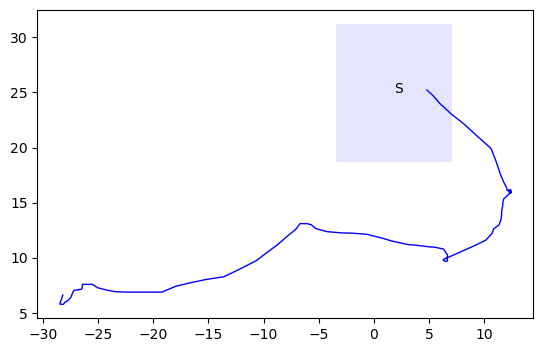

In [22]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [23]:
rotate

,rotated_x,rotated_y,rotated_shift_x,rotated__shift_y
0,-28.207203,6.630478,-28.218381,5.378279
1,-28.314884,6.272014,-28.326062,5.019814
2,-28.460664,5.921541,-28.471842,4.669342
3,-28.460664,5.793273,-28.471842,4.541074
4,-28.460664,5.793273,-28.471842,4.541074
...,...,...,...,...
103,8.121715,22.170043,8.110537,20.917843
104,7.019438,23.031440,7.008260,21.779241
105,5.984300,23.987884,5.973121,22.735685
106,5.313525,24.755319,5.302346,23.503120


In [24]:
coord_scaled_smooth = smooth_curve(sigma, coord_scaled)